## Taif Alsulami

## Lab 2

##  Part 1: Setting Up Your Environment

In [45]:
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')

scikit-learn version: 1.6.1
All libraries loaded successfully!


##  Part 2: Loading and Exploring Data

##  Step 1: Load the Dataset

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')
print(f'Data shape: {X.shape}')
print(f'First 3 rows:\n {X[:3]}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


##  Step 2: Quick Visualization

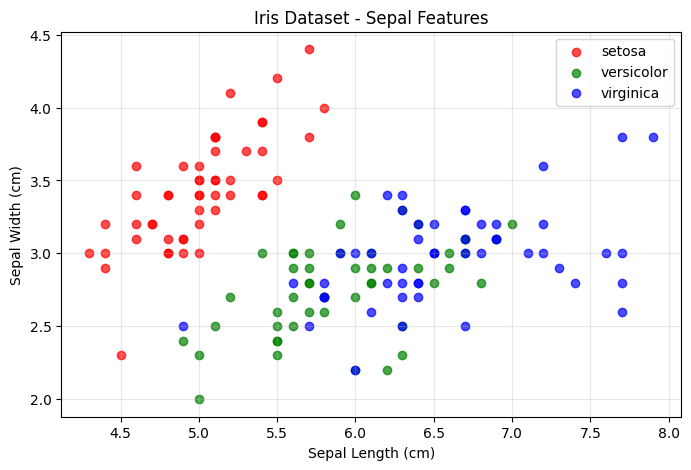

In [47]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']

for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1],
                color=colors[i], label=name, alpha=0.7)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Features')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

##  Part 3: Splitting Data (Train/Test)

## 4.2 Splitting with Scikit-Learn

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Training set: {X_test.shape[0]} samples')

Training set: 120 samples
Training set: 30 samples


## Part 4:Training Your First Model

## 5.1 Model A: Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

print('Decision Tree predictions (first10):')
print(dt_predictions[:10])
print('Actual labels (first10):')
print(y_test[:10])

Decision Tree predictions (first10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first10):
[0 2 1 1 0 1 0 0 2 1]


5.2 Model B:K-Nearest Neighbors (KNN)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

print('KNN predictions (first10):')
print(knn_predictions[:10])

KNN predictions (first10):
[0 2 1 1 0 1 0 0 2 1]


##  Part 5: Evaluating Model Performance

# 6.1 Accuracy Score

In [51]:
from sklearn.metrics import accuracy_score

dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f'Decision Tree Accuracy: {knn_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 100.00%
KNN Accuracy: 100.00%


# 6.2 Classification Report

In [52]:
from sklearn.metrics import classification_report

print('=== Decision Tree ===')
print(classification_report(y_test, dt_predictions, target_names=iris.target_names))

print('=== KNN ===')
print(classification_report(y_test, knn_predictions, target_names=iris.target_names))

=== Decision Tree ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 6.4 Confusion Matrix (Visual)

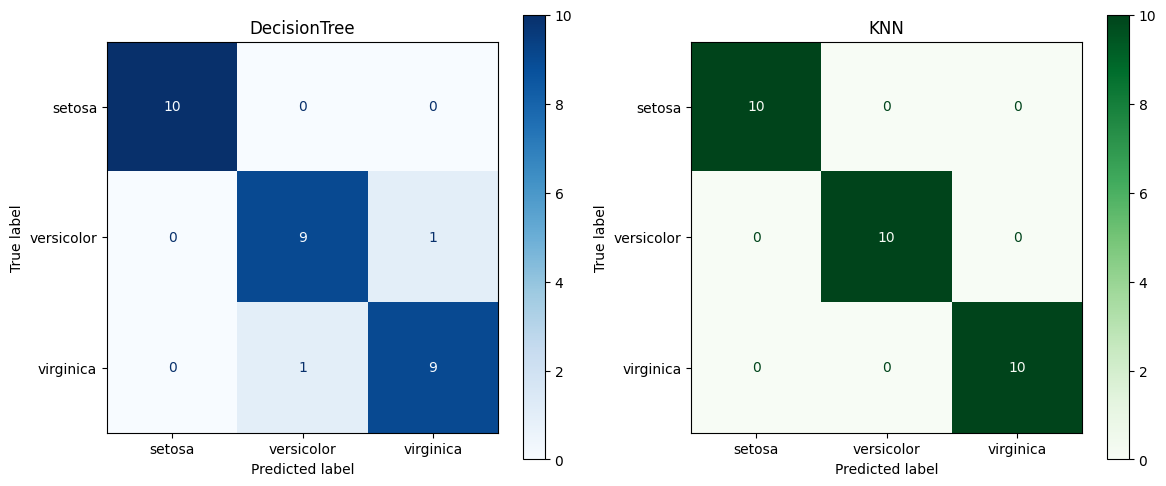

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#DecisionTree
cm_dt=confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt,display_labels=iris.target_names)\
.plot(ax=axes[0],cmap='Blues')
axes[0].set_title('DecisionTree')

#KNN
cm_knn=confusion_matrix(y_test,knn_predictions)
ConfusionMatrixDisplay(cm_knn,display_labels=iris.target_names)\
.plot(ax=axes[1],cmap='Greens')
axes[1].set_title('KNN')
plt.tight_layout()
plt.show()

##  Part 6: Predicting New Samples

In [54]:
import numpy as np

new_flower=np.array([[5.1,3.5,1.4,0.2]])

dt_pred=dt_model.predict(new_flower)
knn_pred=knn_model.predict(new_flower)

print(f'Decision Tree says:{iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says:setosa
KNN says: setosa


##  Part 7: Working with Your Own CSV Data

# 8.1 Step 1: Create a Sample CSV

In [55]:
import pandas as pd
import numpy as np

# Create a simple student performance dataset
np.random.seed(42)
n = 100

data = {
    'study_hours': np.round(np.random.uniform(1, 10, n), 1),
    'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
    'assignments': np.random.randint(3, 10, n),
    'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}

df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)

print('CSV saved! First 5 rows:')
print(df.head())

CSV saved! First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


# 8.2 Step 2: Load the CSV with Pandas

In [56]:
import pandas as pd
df=pd.read_csv('students.csv')

print(f'Shape:{df.shape}')
print(f'\nColumn types:\n{df.dtypes}')
print(f'\nBasic stats:\n{df.describe()}')

Shape:(100, 4)

Column types:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


8.3 Step 3: Prepare Features and Target

In [57]:
X=df[['study_hours','attendance_pct','assignments']].values

y=df['passed'].values
print(f'Features shape:{X.shape}')
print(f'Target shape: {y.shape}')
print(f'Class counts: {np.unique(y,return_counts=True)}')

Features shape:(100, 3)
Target shape: (100,)
Class counts: (array([0, 1]), array([31, 69]))


# 8.4 Step4: Apply the Full Workflow

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
predictions = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')
print(classification_report(y_test, predictions, target_names=['Failed', 'Passed']))


Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



# A short paragraph (5–7 sentences) comparing Decision Tree vs. KNN performance and ex plaining which model you would choose for this task and why:

In this lab, both Decision Tree and KNN performed well on the Iris dataset, but there were some differences in how they made predictions. The Decision Tree model was easy to understand because it creates clear rules based on feature splits, which makes it more interpretable. KNN, on the other hand, works by comparing distances between data points, and its performance depends on the value of k. In my results, both models achieved high accuracy, but KNN was slightly more sensitive to the choice of k. The Decision Tree felt more stable and easier to explain. For this task, I would choose the Decision Tree because it provides strong performance while also being more interpretable and faster during prediction.